In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/Users/nguyenphanthaonguyen/Downloads/SamSung.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2018-12-12  40250.0  40700.0  40150.0  40450.0  35281.417969  12024279
2018-12-13  40650.0  40750.0  40000.0  40000.0  34888.921875  26254646
2018-12-14  40200.0  40200.0  38700.0  38950.0  33973.089844  19671783
2018-12-17  38650.0  39600.0  38650.0  39150.0  34147.535156  11532968
2018-12-18  38300.0  39200.0  38300.0  38900.0  33929.472656  11042101


In [2]:
# 2.  chia train test theo tỉ lệ 9:1
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [3]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18372.417, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18366.192, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18368.114, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18368.112, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18365.152, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18367.208, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.449 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [4]:

y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [5]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000.
 72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000.
 72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000. 72000.]


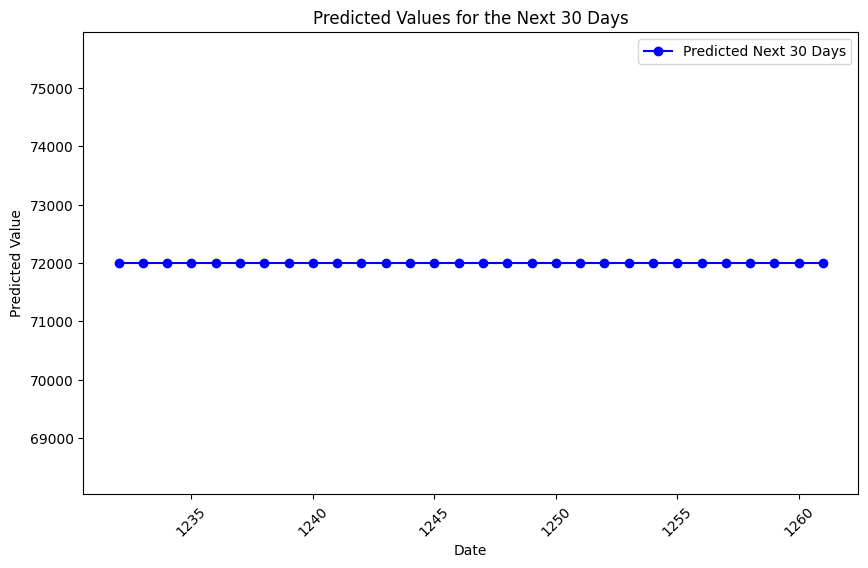

In [6]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 2787.165707834184
Testing MAPE: 0.03172473462981034
Testing MAE: 2172.357723577236


Testing RMSE: 2787.165707834184
Testing MAPE: 0.03172473462981034
Testing MAE: 2172.357723577236


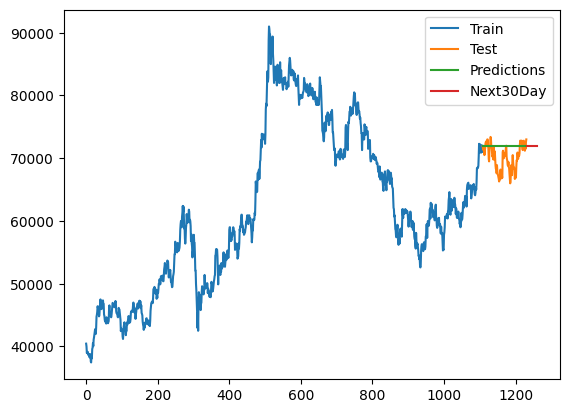

In [8]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=1108, stop=1231, step=1)